# Perform sentimental analysis:
Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

# 1. Import Libraries

In [1]:
import nltk
#nltk.download('stopwords')

In [2]:
#nltk.download('wordnet')

In [3]:
#pip install -U textblob

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

# 2. Import Dataset

In [5]:
data = pd.read_csv('Elon_musk.csv', encoding="latin-1")
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [7]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [8]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [9]:
data = [Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
data = [Text for Text in data if Text]

In [10]:
#tokenizing
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:15]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [11]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [12]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] # for top 20
freq1

the                 405
to                  394
is                  353
a                   331
of                  307
&amp;               218
in                  209
for                 180
be                  155
@Erdayastronaut     140
@SpaceX             140
will                137
RT                  127
on                  125
@PPathole           123
I                   115
@flcnhvy            114
but                 111
that                104
with                101
are                  95
it                   90
at                   87
Tesla                85
The                  80
we                   77
and                  72
this                 72
@SpaceX:             71
from                 70
have                 69
was                  69
@WholeMarsBlog       68
as                   65
@Tesla               64
@teslaownersSV       62
This                 61
you                  59
We                   58
@Teslarati           56
has                  55
@NASASpaceflight

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashwini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashwini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [16]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [17]:
sent_df

,sentence,sentence1,clean
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!,Now next even more!!
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...","@kenyanwalstreet Not actually payout, vesting ...","@kenyanwalstreet Not actually payout, vesting ..."
920,"It may never pay out, as the stock cant b ht...","It may never pay out, stock cant b https://t....","It may never pay out, stock cant b https://t...."
921,Details Aug 28.,Details Aug 28.,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [18]:
sent_df=sent_df.drop('sentence',axis=1)
sent_df

,sentence1,clean
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge underestimated @teslacn Congratu...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now next even more!!,Now next even more!!
...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...","@kenyanwalstreet Not actually payout, vesting ..."
920,"It may never pay out, stock cant b https://t....","It may never pay out, stock cant b https://t...."
921,Details Aug 28.,Details Aug 28.
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [19]:
sent_df=sent_df.drop('sentence1',axis=1)
sent_df

,clean
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge underestimated @teslacn Congratu...
4,Now next even more!!
...,...
919,"@kenyanwalstreet Not actually payout, vesting ..."
920,"It may never pay out, stock cant b https://t...."
921,Details Aug 28.
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [20]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [21]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [22]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(Text: str = None):
    sent_score = 0
    if Text:
        clean = nlp(Text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [23]:
#calulating the sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

In [24]:
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [25]:
#word count for "clean"column
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1     3
2     4
3    11
4     4
5     4
6     9
7    10
8     6
9    74
Name: word_count, dtype: int64

In [26]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinelo...,-8,41
64,"Also, road hell mostly paved bad intentions.",-7,7
837,Cool Model 3 review @iamjamiefoxx https://t.co...,-5,45
680,"Occasional flights land ok, frequent (daily) f...",-4,26
611,"Then static fire, checkouts, static fire, fly ...",-4,11
920,"It may never pay out, stock cant b https://t....",-4,21
219,@RGVaerialphotos It real soon @MarcusHouseGame...,-3,13
220,External https://t.co/csIZk6sEVu @bcart03 @nex...,-3,22
630,You modern day moron.,-3,4
412,Also Dead Space 2.,-3,4


In [27]:
sent_df['sentiment_value'].describe() #max sentiment value=16 and min sentiment value=-8

count    924.000000
mean       1.359307
std        2.654278
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       18.000000
Name: sentiment_value, dtype: float64

In [28]:
#sentiment value less than or equal to 0
sent_df[sent_df['sentiment_value']<=0]

,clean,sentiment_value,word_count
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9
1,Have tried it?,0,3
4,Now next even more!!,0,4
5,Happy New Year Ox!,0,4
6,"https://t.co/9WFKMYu2oj Frodo underdoge, All t...",-2,9
...,...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...",0,7
920,"It may never pay out, stock cant b https://t....",-4,21
921,Details Aug 28.,0,3
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,29


In [29]:
#sentiment value greater than 0
sent_df[sent_df['sentiment_value']>0]

,clean,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The entertaining outcome likely @GiveDirectly ...,3,74
17,Back work I go @CapybaraSurfer @MattWallace888...,4,28
...,...,...,...
911,He one best.,3,3
913,"@Ali_Afshari In general, need improve podcasts...",4,72
915,"@burakaydik True Wow, IHOP &amp; GitHub close ...",3,12
917,This great &amp; terrifying.,3,4


In [30]:
sent_df['index']=range(0,len(sent_df))
sent_df

,clean,sentiment_value,word_count,index
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9,0
1,Have tried it?,0,3,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11,3
4,Now next even more!!,0,4,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...",0,7,919
920,"It may never pay out, stock cant b https://t....",-4,21,920
921,Details Aug 28.,0,3,921
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,29,922


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

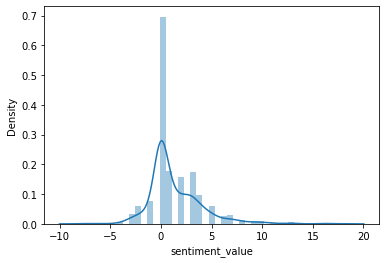

In [31]:
#densityplot based on sentiment value
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

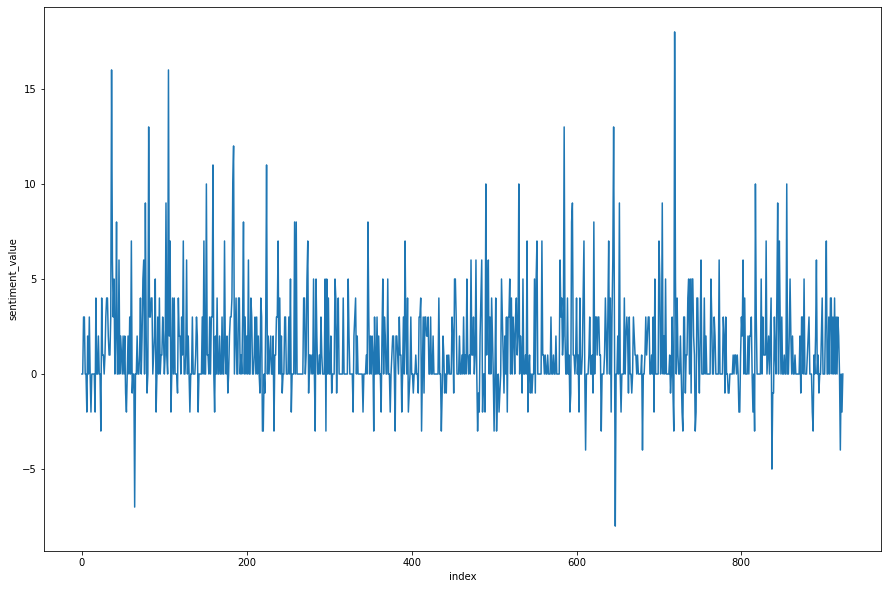

In [32]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

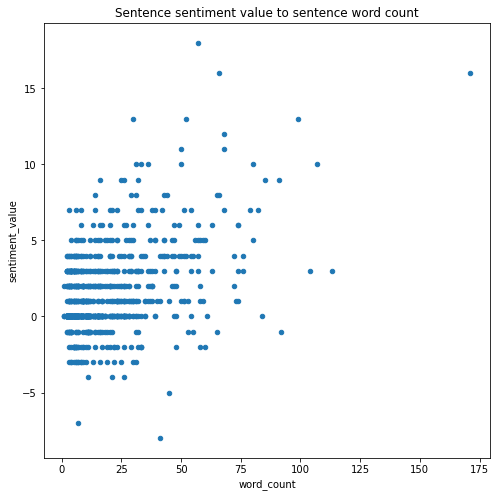

In [33]:
#scatterplot between wordcount and sentiment value
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# AFTER PERFORMING SENTIMENT ANALYSIS WE CAN CONCLUDE THAT MOST SENTENCES OF IT ARE NEUTRAL